<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import datetime as dt

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>

In [2]:
# Load the data
df_ai = pd.read_csv(r'asset_information_data.csv')
df_ap = pd.read_csv(r'asset_price_data.csv', parse_dates=["date"])
df_pw = pd.read_csv(r'portfolio_weights.csv', parse_dates=["date"])

# Data Preprocessing
df_asset_info = df_ai.copy()
df_asset_price = df_ap.copy()
df_portfolio = df_pw.copy()

df_asset_price

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


<h3 style="color: #FF6347;">Data exploration</h3>

In [3]:
print('Heads of assets info')
print(df_asset_info.head(5))
print('Heads of assets price')
print(df_asset_price.head(3))
print('Heads of portfolio weights')
print(df_portfolio.head(3))
print()
print(f"asset information: {df_asset_info.shape}\nasset price:{df_asset_price.shape}\nportfolio weights: {df_portfolio.shape}")

Heads of assets info
     Name        Family
0  Asset1  Fixed Income
1  Asset2  Fixed Income
2  Asset3        Equity
3  Asset4        Equity
4  Asset5   Alternative
Heads of assets price
        date    Asset1  Asset2     Asset3  Asset4  Asset5
0 2019-01-02  231.5061  55.875  25.649222  302.93   50.89
1 2019-01-03  231.0356  54.977  25.503047  302.11   50.41
2 2019-01-04  230.4026  56.129  26.147133  301.77   51.38
Heads of portfolio weights
        date    Asset1    Asset2    Asset3   Asset4    Asset5
0 2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974
1 2019-01-03  0.225458  0.116255  0.265003  0.23031  0.162974
2 2019-01-04  0.225458  0.116255  0.265003  0.23031  0.162974

asset information: (5, 2)
asset price:(783, 6)
portfolio weights: (783, 6)


In [4]:
df_asset_price.describe().T

,count,mean,min,25%,50%,75%,max,std
date,783,2020-07-02 09:33:47.586207232,2019-01-02 00:00:00,2019-10-02 12:00:00,2020-07-02 00:00:00,2021-04-01 12:00:00,2021-12-31 00:00:00,NaN
Asset1,770.0,248.980188,229.7012,246.86805,250.68535,253.379275,259.11,6.845006
Asset2,770.0,76.112381,48.516,64.78625,72.003,88.973,104.663,13.642823
Asset3,770.0,31.473296,22.895066,29.281948,30.651198,33.757265,39.115,3.304415
Asset4,734.0,327.35688,272.79,318.765,326.665,340.155,345.71,13.487611
Asset5,763.0,54.123198,37.34,49.12,52.72,59.5,71.05,8.185047


In [5]:
df_portfolio.describe().T

,count,mean,min,25%,50%,75%,max,std
date,783,2020-07-02 09:33:47.586207232,2019-01-02 00:00:00,2019-10-02 12:00:00,2020-07-02 00:00:00,2021-04-01 12:00:00,2021-12-31 00:00:00,NaN
Asset1,783.0,0.206294,0.071307,0.071307,0.225458,0.321749,0.321749,0.103294
Asset2,783.0,0.169973,0.116255,0.116255,0.127529,0.266093,0.266093,0.068166
Asset3,783.0,0.185726,0.123941,0.123941,0.168775,0.265003,0.265003,0.05886
Asset4,783.0,0.250435,0.185697,0.185697,0.23031,0.33547,0.33547,0.062866
Asset5,783.0,0.187571,0.158356,0.158356,0.162974,0.241084,0.241084,0.038019


In [6]:
print(df_asset_price.dtypes)
print(df_portfolio.dtypes)

date      datetime64[ns]
Asset1           float64
Asset2           float64
Asset3           float64
Asset4           float64
Asset5           float64
dtype: object
date      datetime64[ns]
Asset1           float64
Asset2           float64
Asset3           float64
Asset4           float64
Asset5           float64
dtype: object


Checking for missing values and duplicates

In [7]:
print(df_asset_price.isna().sum())
print()
print(df_portfolio.isna().sum())
print()
print(df_asset_price.duplicated().sum())
print(df_portfolio.duplicated().sum())

date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

0
0


In [8]:
df_nulls = df_asset_price[df_asset_price.isna().any(axis=1)]
df_nulls.head(5)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
77,2019-04-19,NaN,NaN,NaN,NaN,NaN
78,2019-04-22,NaN,NaN,NaN,NaN,NaN
85,2019-05-01,NaN,NaN,NaN,NaN,NaN
88,2019-05-06,236.6797,64.779,29.829795,NaN,53.37
90,2019-05-08,236.9893,64.080,29.517921,NaN,53.12


Getting rid of NaNs using forward fill method, assuming that the last known value persists until a new one is available

In [9]:
df_asset_price = df_asset_price.fillna(method='ffill')
df_nulls

,date,Asset1,Asset2,Asset3,Asset4,Asset5
77,2019-04-19,NaN,NaN,NaN,NaN,NaN
78,2019-04-22,NaN,NaN,NaN,NaN,NaN
85,2019-05-01,NaN,NaN,NaN,NaN,NaN
88,2019-05-06,236.6797,64.779,29.829795,NaN,53.370
90,2019-05-08,236.9893,64.080,29.517921,NaN,53.120
103,2019-05-27,238.0456,62.770,29.600180,NaN,52.870
106,2019-05-30,238.5373,61.773,29.219141,NaN,52.690
113,2019-06-10,241.1928,64.282,29.809286,NaN,51.610
160,2019-08-14,252.4394,63.344,29.010035,NaN,50.250
161,2019-08-15,254.2854,62.874,28.977507,NaN,NaN


Converting date column into index

In [10]:
df_asset_price = df_asset_price.set_index('date')
df_portfolio = df_portfolio.set_index('date')


In [11]:
df_asset_price.index
df_portfolio.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='date', length=783, freq=None)

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

In [12]:
df_asset_price
df_daily_return = df_asset_price.pct_change()*100
print(df_daily_return)

              Asset1    Asset2    Asset3    Asset4    Asset5
date                                                        
2019-01-02       NaN       NaN       NaN       NaN       NaN
2019-01-03 -0.203234 -1.607159 -0.569902 -0.270690 -0.943211
2019-01-04 -0.273984  2.095422  2.525524 -0.112542  1.924221
2019-01-07 -0.151170  1.263162 -0.733753  0.185572  1.479175
2019-01-08 -0.153486  0.100285  0.703977  0.360533 -0.019179
...              ...       ...       ...       ...       ...
2021-12-27 -0.091306  0.738415  0.543901  0.000000  1.344319
2021-12-28  0.006442  0.548309  0.759918  0.000000 -0.114106
2021-12-29 -0.486243 -0.158812 -0.664707  0.017523 -0.314151
2021-12-30 -0.069556  0.290341  0.334577  0.026280  0.143246
2021-12-31  0.082881 -0.532184  0.051302  0.011677  0.000000

[783 rows x 5 columns]


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

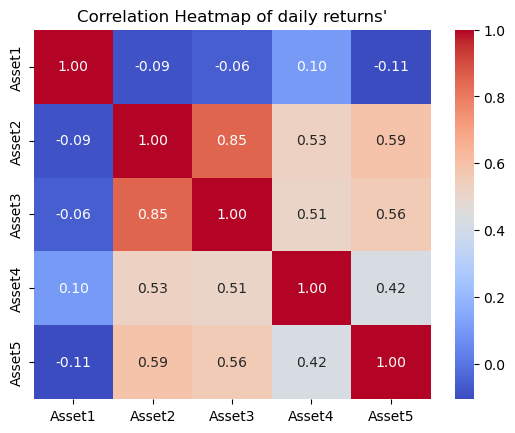

In [13]:
dr_corr = df_daily_return.corr()

# Heatmap:
sns.heatmap(dr_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of daily returns'")
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

Let's choose the Assets that have the smallest correlation to avoid redundancy and observe somewhat different distributions

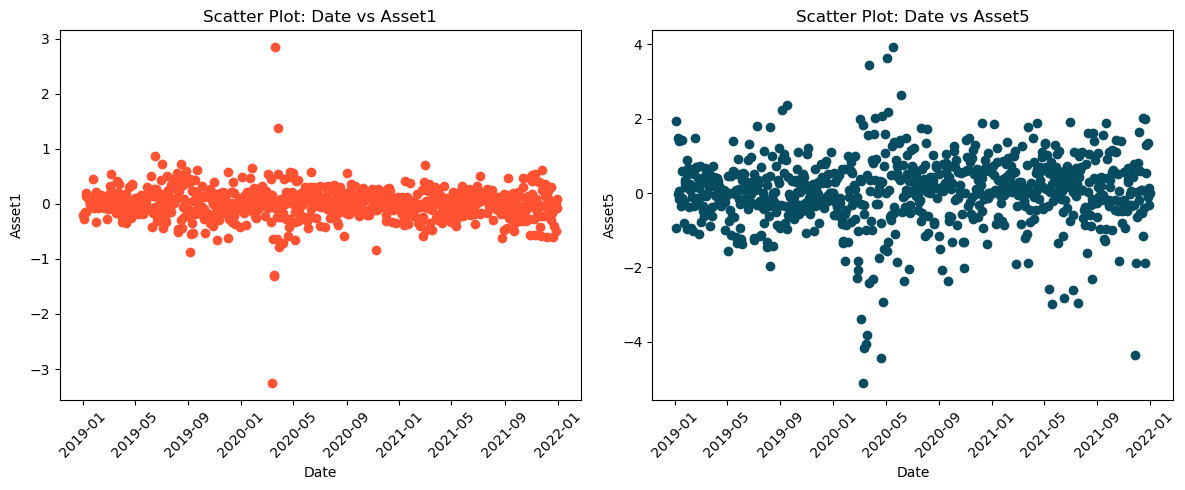

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Scatter plot for the Asset1
axes[0].scatter(df_daily_return.index, df_daily_return['Asset1'], color='#FF5233')
axes[0].set_title('Scatter Plot: Date vs Asset1')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Asset1')
axes[0].tick_params(axis='x', rotation=45)


# Scatter plot for the Asset5
axes[1].scatter(df_daily_return.index, df_daily_return['Asset5'], color='#084C61')
axes[1].set_title('Scatter Plot: Date vs Asset5')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Asset5')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

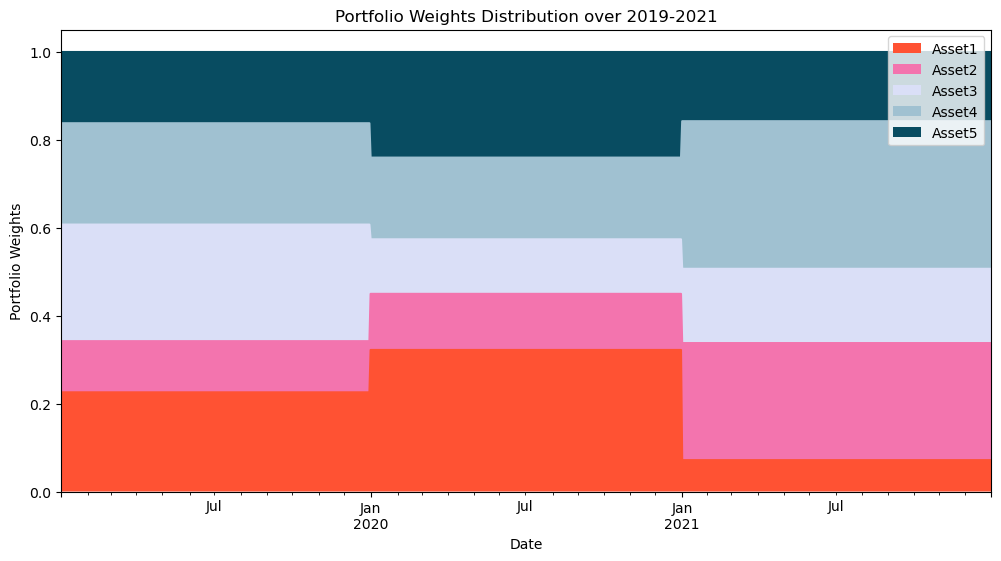

In [15]:
colors = ['#FF5233','#F374AE','#DADFF7','#A0C1D1','#084C61']


area_c = df_portfolio.plot.area(figsize=(12, 6), color=colors) 

for collection in area_c.collections:
    collection.set_edgecolor("none")

area_c.legend(loc='upper right')
plt.title("Portfolio Weights Distribution over 2019-2021")
plt.xlabel("Date")
plt.ylabel("Portfolio Weights")
plt.show()


<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>

In [16]:
# Calculate the cumulative returns for each asset in the portfolio
years = ['2019', '2020', '2021']
weights = {
    '2019': df_portfolio.loc['2019-01-02'].values,
    '2020': df_portfolio.loc['2020-01-01'].values,
    '2021': df_portfolio.loc['2021-01-01'].values
}


df_cumulative = pd.DataFrame(index=df_daily_return.index, columns=df_daily_return.columns)

# Loop through each year and calculate the cumulative returns
for year in years:
    df_year = df_daily_return.loc[year]
    
    # Calculate the portfolio return for the year
    df_portfolio_return = df_year * weights[year]
    
    df_cumulative.loc[year] = ((1 + df_portfolio_return / 100).cumprod() - 1) * 100

print(df_cumulative)


              Asset1    Asset2    Asset3    Asset4    Asset5
date                                                        
2019-01-02       NaN       NaN       NaN       NaN       NaN
2019-01-03 -0.045821  -0.18684 -0.151026 -0.062342 -0.153719
2019-01-04 -0.107564  0.056308  0.517235 -0.088246  0.159398
2019-01-07  -0.14161  0.203239  0.321783 -0.045544  0.400849
2019-01-08 -0.176166  0.214921  0.508939  0.037452  0.397711
...              ...       ...       ...       ...       ...
2021-12-27 -0.228445  6.957698  4.098859  0.530579  4.810076
2021-12-28 -0.227986   7.11375  4.232371  0.530579  4.791137
2021-12-29  -0.26258  7.068485  4.115437  0.536489  4.739006
2021-12-30 -0.267527  7.151204  4.174229  0.545352  4.762765
2021-12-31 -0.261633  6.999466  4.183249  0.549291  4.762765

[783 rows x 5 columns]


Line chart to display the historical cumulative returns of portfolio per asset

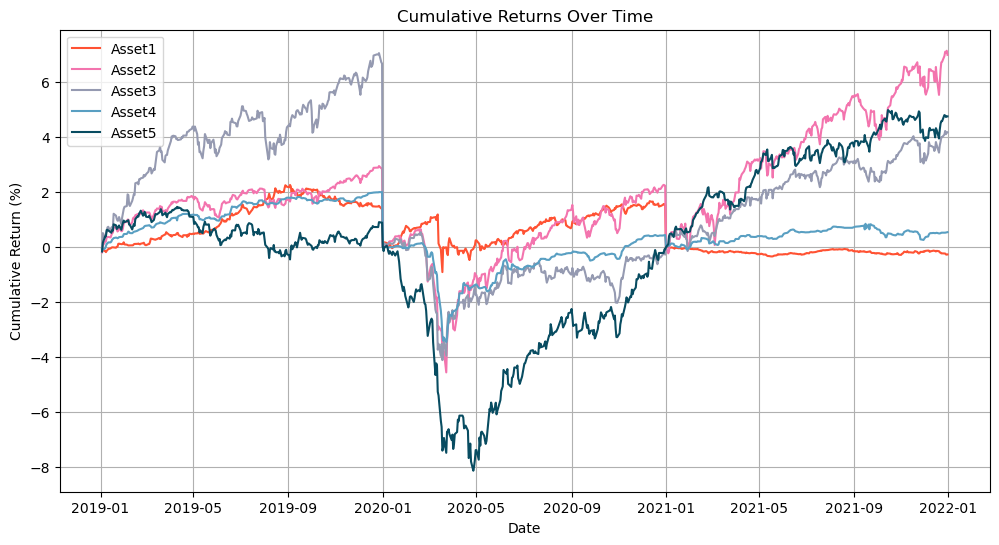

In [17]:
colors = ['#FF5233','#F374AE','#959AB1','#599FC2','#084C61']

plt.figure(figsize=(12, 6))
for i, asset in enumerate(df_cumulative.columns):
    plt.plot(df_cumulative.index, df_cumulative[asset],
             label=asset,
             color=colors[i % len(colors)])

plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.title("Cumulative Returns Over Time")
plt.legend()
plt.grid(True)
plt.show()



<h2 style="color: #FF6347;">Annualized Return.</h2>

Calculation based on general folmula of annualized return of a portfolio

In [18]:
# Calculate the portfolio daily returns
portfolio_daily_returns = []

for year in years:
    df_year = df_daily_return.loc[year]
    weighted_returns = df_year * weights[year]
    portfolio_return = weighted_returns.sum(axis=1)
    portfolio_daily_returns.append(portfolio_return)

portfolio_daily_return = pd.concat(portfolio_daily_returns).sort_index()
portfolio_daily_return_dec= portfolio_daily_return / 100

# Calculate the cumulative return
total_growth = (1 + portfolio_daily_return_dec).prod()

# Calculate the number of years in the portfolio
n_years = (portfolio_daily_return.index[-1] - portfolio_daily_return.index[0]).days / 261

# Calculate the annualized return
annualized_return = total_growth ** (1 / n_years) - 1

print("Total Cumulative Return: {:.2%}".format(total_growth - 1))
print("Annualized Return: {:.2%}".format(annualized_return))


Total Cumulative Return: 38.57%
Annualized Return: 8.09%


<h2 style="color: #FF6347;">Annualized Volatility.</h2>

In [19]:
daily_volatility = portfolio_daily_return_dec.std()
annualized_volatility = daily_volatility * np.sqrt(252)
print("Annualized Volatility: {:.2%}".format(annualized_volatility))

Annualized Volatility: 8.36%


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>

<Figure size 1200x600 with 0 Axes>

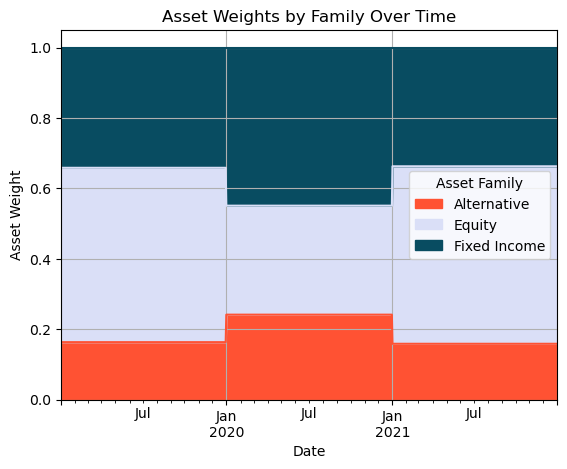

In [20]:
# Calculate the Sharpe Ratio
asset_family = df_asset_info.set_index("Name")["Family"].to_dict()

# Calculate the average daily return and standard deviation of the portfolio
group_keys = [asset_family.get(col, "Other") for col in df_portfolio.columns]

# Calculate the average daily return for each asset family
df_grouped_weights = df_portfolio.groupby(by=group_keys, axis=1).sum()

colors1 = ['#FF5233','#DADFF7','#084C61']

# Plot the area chart for asset weights by family
plt.figure(figsize=(12, 6))
df_grouped_weights.plot.area(color=colors1)
plt.xlabel("Date")
plt.ylabel("Asset Weight")
plt.title("Asset Weights by Family Over Time")
plt.legend(title="Asset Family")
plt.grid(True)
plt.show()

